# Modelling Wind Speed and Direction Distribution using Gaussain Mixture Modles (OEN method)

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Modles, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()

## 1.2 Read Data

In [2]:
# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # weird shape at 3, maybe 4
# ipath= './data/NCDC/uk/middle_wallop/dat.txt'
# ipath= './data/NCDC/uk/southhamption/dat.txt'
# ipath= './data/NCDC/uk/bournemouth/dat.txt'
# ipath= './data/NCDC/tiree.txt'
# ipath= "./data/NCDC/marham.txt"
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/lakenheath/dat.txt" # irregular sampling time
# ipath= "./data/NCDC/uk/mildenhall/dat.txt" # irregular sampling time

# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # recent 5 year maybe corrupted
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # high initial data
# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # corrupted
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt"
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year data is corrupted

# ipath= "./data/NCDC/canada/melita_man/dat.txt" 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/st_johns_intl/dat.txt" # lack 2011-12
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt"  # uptail wind speed 
# ipath= "./data/NCDC/canada/fort_smith/dat.txt" # hard to fit
# ipath= "./data/NCDC/canada/havre_st_pierre/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/moosonee_awos/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/hay_rivier_a/dat.txt" # truncate
# ipath= "./data/NCDC/canada/gander_intl/dat.txt" # truancate dataset, try 4, lack of 2011-12
# ipath= "./data/NCDC/canada/tukialik_bay/dat.txt" # truncate, time shift
# ipath= "./data/NCDC/canada/lac_benoit_que/dat.txt" # has 0 speed records
# ipath= "./data/NCDC/canada/blank_sablon/dat.txt" # truncate
# ipath= "./data/NCDC/canada/argentia/dat.txt" # weird shape
# ipath= "./data/NCDC/canada/longue_pointe/dat.txt" # data may have problem, weird direction distribution

# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4, wathc for KDE bandwidth
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; narror ellipse
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer
# ipath= "./data/NCDC/europe/salamanca/dat.txt" # recent 5 year is truncate data, before is better

# ipath= "./data/NCDC/south_america/senador_petronio/dat.txt"
# ipath= "./data/NCDC/south_america/ambrosio_lv/dat.txt" # 16 sectors

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane/dat.txt" # bad fit
# ipath= "./data/NCDC/oceania/auckland/dat.txt"  # Weird KDE shape

# ipath= "./data/NCDC/cn/luogang/dat.txt"  # 
# ipath= "./data/NCDC/cn/binhai/dat.txt" # recent 5 may be corrupted, before is better
# ipath= "./data/NCDC/cn/tianjing/dat.txt"  
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" # could apply width/length constrain
# ipath= "./data/NCDC/cn/gushi/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/yueyang/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/wuxu/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/广州baiyun/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/武汉tianhe/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/zhengding/dat.txt" #  Initial data weird
# ipath= "./data/NCDC/cn/wusu/dat.txt" # initial speed weird
# ipath= "./data/NCDC/cn/beijing/dat.txt"  # very bad fit

# ipath= "./data/NCDC/cn/baoan_intl/dat.txt" # 
# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= './data/NCDC/cn/macau/dat.txt' # not good, feels like truncate data
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # truncate dataset

## US dataset, is mostly truncate, low wind speed is not complete
# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted
# ipath= "./data/NCDC/us/sacramento_arp/dat.txt"  
# ipath= "./data/NCDC/us/st_louis_arp/9511346969491dat.txt"  
# ipath= './data/NCDC/us/huron/3461896967321dat.txt'
# ipath= "./data/NCDC/us/baltimore/9963956959409dat.txt"
# ipath= './data/NCDC/us/kennedy/5807936958436dat.txt'
ipath= './data/NCDC/us/newark/dat.txt'
# ipath= './data/NCDC/us/la_guardia/1057036958434dat.txt'
# ipath= "./data/NCDC/us/olympia_airport/2647036962786dat.txt" 
# ipath= "./data/NCDC/us/sidney/6062326959357dat.txt" 
# ipath= "./data/NCDC/us/general_mitchell_intl/dat.txt"
# ipath= "./data/NCDC/us/quad_city_arp/dat.txt" 

## Problem dataset
# ipath= "./data/NCDC/canada/stony_rapids_arpt/dat.txt" # truncate data
# ipath= "./data/NCDC/canada/baker_lake/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/rankin_inlet/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/deer_lake_a/dat.txt" # bad dataset
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # recent year speed wired
# ipath= "./data/NCDC/south_america/carlos_ibanez/dat.txt" # bad dataset, direction
# ipath= "./data/NCDC/south_america/rio_cuarto/dat.txt"  # bad dataset
# ipath= "./data/NCDC/south_america/senador_nilo/dat.txt" # bad dataset, direction 
# ipath= "./data/NCDC/cn/长沙huanghua/dat.txt" # direction may not be real
# ipath= "./data/NCDC/dr_ambedkar_intl/dat.txt" # Wrong data

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

uipath = unicode(ipath , "utf8")

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed' ]]
else:
    df = read_cn_database(uipath)

/Users/cqcn1991/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df.query("(dir < 999) & (speed < 999) & \
              (date >= 19800000) & (date < 20160000) ")
df.index= df['date']

In [4]:
# Turn dir into [0,360), some station are[10,360],some are [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360) 
df['dir_windrose'] = df['dir']
# Convert windrose coordianates to Polar Cooridinates 
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360)
df.describe()

,date,HrMn,dir,speed,dir_windrose
count,3.542910e+05,354291.000000,354291.000000,354291.000000,354291.000000
mean,1.998111e+07,1163.461824,168.502087,4.687320,188.606815
std,1.042016e+05,697.094130,89.380652,2.190624,108.038719
min,1.980010e+07,0.000000,0.000000,0.500000,0.000000
25%,1.989062e+07,600.000000,90.000000,3.100000,90.000000
50%,1.999010e+07,1200.000000,170.000000,4.100000,210.000000
75%,2.007083e+07,1800.000000,230.000000,5.700000,280.000000
max,2.015123e+07,2359.000000,350.000000,29.300000,350.000000


True


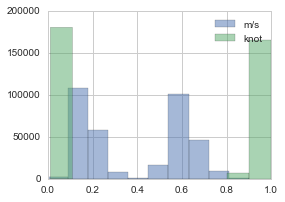

In [5]:
# Detect data stored in knot or m/s
## For data stored originally in knot, the data would cluster at 0.1 and 0.9
df['decimal'] = df.speed % 1 
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4,3))
knot_unit = True if len(df.query('decimal >= 0.2'))/len(df) > 0.3 else False

# Using unit in knot instead of m/s
if knot_unit:
    df['speed']=df['speed']*1.943845
    df['decimal'] = df.speed % 1 
    df.decimal.hist(alpha=0.5,label='knot')
    # need more elaboration, some is not near an integer
    df['speed']=df['speed'].apply(lambda x: int(round(x)))
    plt.legend()

print knot_unit

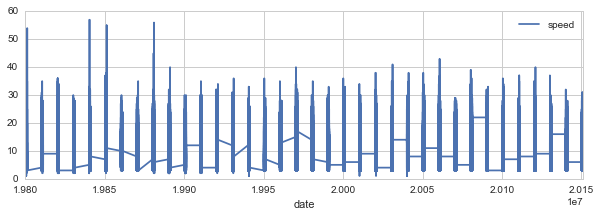

In [6]:
df['speed'].plot(legend=True,figsize=(10,3), grid=True)

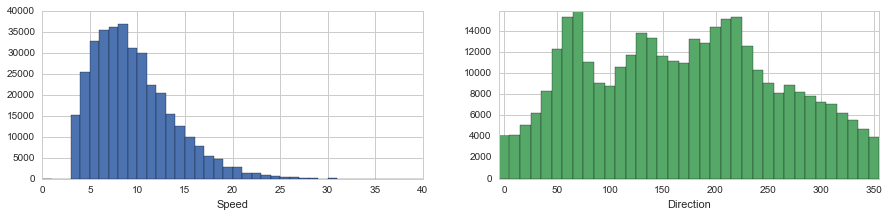

In [7]:
# Notice the gap of the distributions, so futher process needed, as below
plot_speed_and_angle_distribution(df.speed, df.dir)

## 1.3 Data Wrangling

### 1.3.1 Artefacts handling

#### 1.3.1.1 wrong direction record

In [8]:
display(df.query('dir % 10 >= 0.1'))
df = df.query('dir % 10 <= 0.1')

,date,HrMn,type,dir,speed,dir_windrose,decimal
date,,,,,,,
20020709,20020709,1551,FM-16,13,1,77,0.971923


#### 1.3.1.2 sudden increase in speed

,date,HrMn,type,dir,speed,dir_windrose,decimal,incre,incre_reverse
date,,,,,,,,,
19840415,19840415,510,SAOSP,50,57,40,0.954659,46.0,44.0
19881001,19881001,1109,SAOSP,350,56,100,0.982736,48.0,50.0
19851201,19851201,1912,SAOSP,270,55,180,0.010814,47.0,44.0
19801218,19801218,1700,SAO,320,54,130,0.844507,40.0,42.0
19800221,19800221,1900,SAO,170,53,280,0.872584,36.0,36.0
19800424,19800424,1700,SAO,240,50,210,0.956817,45.0,40.0
19880717,19880717,2240,SAOSP,100,45,350,0.097204,30.0,40.0
20060718,20060718,2351,FM-15,140,43,310,0.570206,32.0,31.0
19800603,19800603,1937,SAOSP,160,43,290,0.958975,31.0,26.0


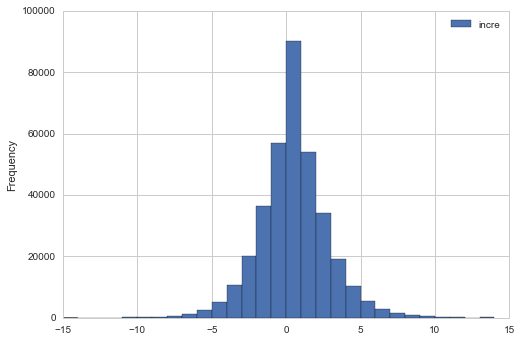

In [9]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True)

In [10]:
incre_threshold = 20 if knot_unit else 10
print 'sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )'))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

sudden increase number 20


After Simple Aretefacts Handling

In [11]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

,date,HrMn,type,dir,speed,dir_windrose,decimal,incre,incre_reverse
date,,,,,,,,,
20031113,20031113,1851,FM-15,180,41,270,0.015130,7.0,16.0
19970306,19970306,1151,FM-15,160,40,290,0.043207,22.0,14.0
20121030,20121030,151,FM-15,340,40,110,0.043207,1.0,0.0
20121030,20121030,351,FM-15,340,40,110,0.043207,0.0,10.0
20080309,20080309,4,FM-16,200,39,250,0.071285,20.0,8.0
20121030,20121030,51,FM-15,340,39,110,0.071285,5.0,-1.0
20041201,20041201,1951,FM-15,170,38,280,0.099362,17.0,12.0
20050428,20050428,1951,FM-15,170,38,280,0.099362,18.0,24.0
20020419,20020419,2151,FM-15,130,38,320,0.904978,21.0,8.0


#### 1.3.1.3 re-distribute angle, for un-evenly sectored data
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [12]:
df['dir'].value_counts().sort_index()

0       4087
10      4111
20      5049
30      6266
40      8276
50     12335
60     15312
70     15851
80     11031
90      9095
100     8757
110    10611
120    11751
130    13830
140    13327
150    11664
160    11193
170    10989
180    13242
190    12812
200    14359
210    15092
220    15322
230    12565
240    10274
250     9114
260     8094
270     8908
280     8239
290     7883
300     7316
310     7118
320     6197
330     5571
340     4680
350     3947
Name: dir, dtype: int64

In [13]:
effective_coloumn = df['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()

if len(effective_coloumn) == 16:
    # For some dataset, the angle is not evenly distributed, so there is a need to redistribute
    original_angle = list(effective_coloumn.sort_index().index)
    redistributed_angle = linspace(0,360,num=17)[:-1]
    df['dir'].replace(to_replace=original_angle, value=redistributed_angle, inplace=True)
    display(df['dir'].value_counts().sort_index())

SECTOR_LENGTH = 360/len(effective_coloumn)
print len(effective_coloumn), SECTOR_LENGTH

36 10.0


### 1.3.2 Sampling Type Selection

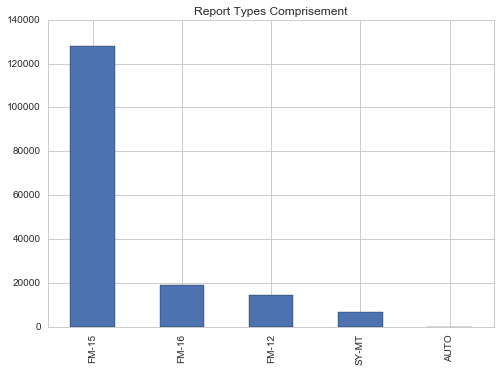

In [14]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement')

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

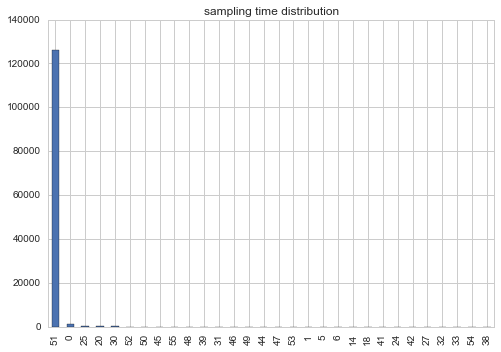

In [15]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution')

sampling_time_most_used = sample_time.value_counts().argmax()
df = df.query("sample_time==@sampling_time_most_used")
df.drop(['sample_time'], 1,inplace=True)

In [16]:
df['HrMn'].value_counts().sort_index()

51      6620
151     6551
251     6497
351     6437
451     6391
551     5698
651     6226
751     6204
851     6189
951     6200
1051    6298
1151    5741
1251    6296
1351    6240
1451    6145
1551    6109
1651    6214
1751    5703
1851    6426
1951    6541
2051    6687
2151    6735
2251    6763
2351    6012
Name: HrMn, dtype: int64

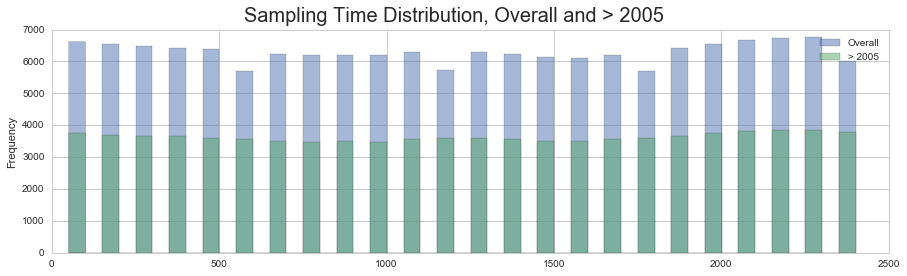

In [17]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2
# Ensure data sampled equally
bins=arange(min(df.HrMn), max(df.HrMn) + 100, 50)

df['HrMn'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='> %s' %  MID_YEAR )

plt.suptitle('Sampling Time Distribution, Overall and > %s ' %  MID_YEAR, fontsize = 20)
plt.legend()

### 1.3.4 Re-distribute Direction and Speed
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [18]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

def randomize_angle(df, sector_length = 10):
    if DIR_REDISTRIBUTE == 'even':
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(-sector_length/2,sector_length/2)))
    else:
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(0,sector_length)))

    bins=arange(0, 360+10, 5)
    df['dir'].hist(bins=bins, alpha=0.5)
    bins=arange(0, 360+10, 1)
    df['dir_ran'].hist(bins=bins, alpha=0.5,figsize=(15, 4))
    
    df['dir']=df['dir_ran']
    df.drop(['dir_ran'], 1,inplace=True)
    return df

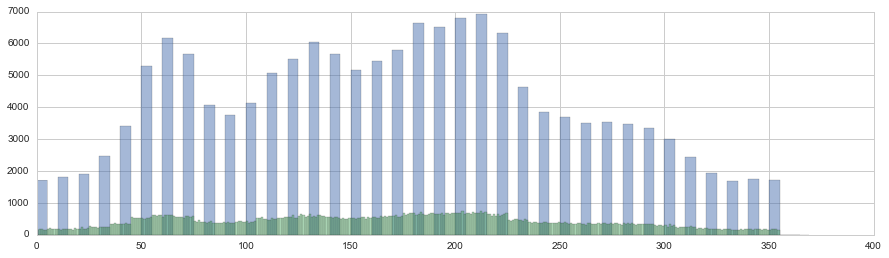

In [19]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, SECTOR_LENGTH)

In [20]:
def randomize_speed(df):
    # Round down speed, need more caution
    if len(df.query('speed < 1')) > 200:
        # if has zero data
        df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(0,1)))
    else:
        # if lack zero
        df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(-1,0)) if x > 0 else x)

    max_speed = df.speed.max()
    df['speed'].hist(bins=arange(0, max_speed), alpha=0.5)
    df['speed_ran'].hist(bins=arange(0, max_speed, 0.5), alpha=0.5,figsize=(15, 4))
    
    df['speed']=df['speed_ran']
    df.drop(['speed_ran'], 1,inplace=True)
    return df

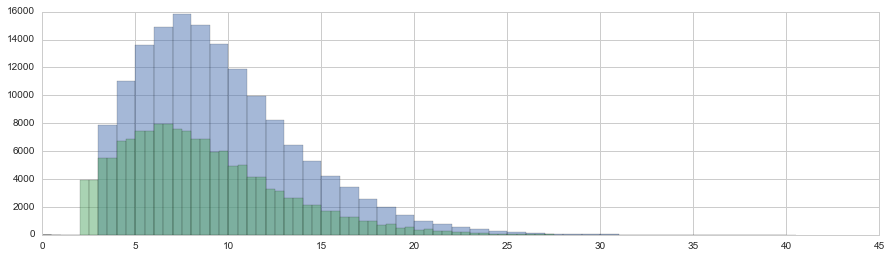

In [21]:
# Each original cell is split between the value, # so the peak is shift left
# e.g. 2 -> (1.5,2), (2,2.5); or 3 -> (2,3)
df = randomize_speed(df)

### 1.3.5 Generate (x,y) from (speed,dir)

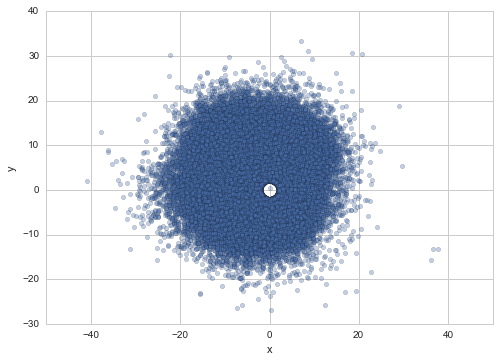

In [22]:
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
ax.set_aspect('equal')
df.plot(kind='scatter', x='x', y='y', alpha=0.35, ax=ax)

## 1.4 Time Shift Comparison

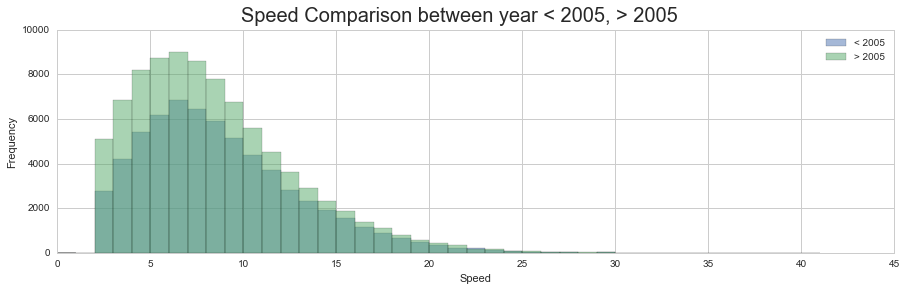

In [23]:
# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='> %s' % MID_YEAR)

plt.xlabel("Speed")
plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 20)
plt.legend()

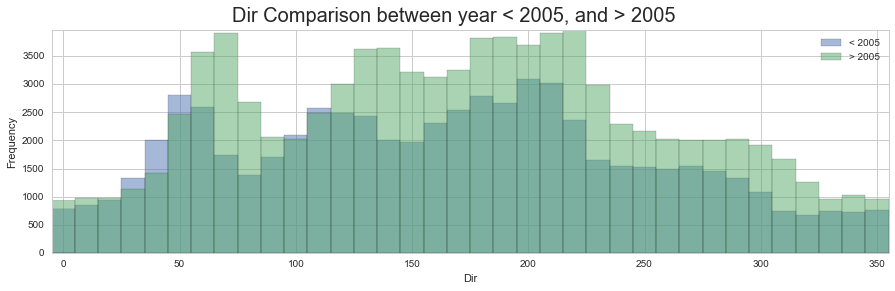

In [24]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.xlabel("Dir")
plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 20)
plt.axis('tight')
plt.legend()

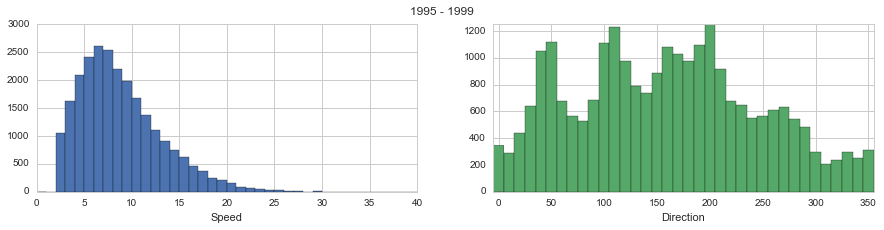

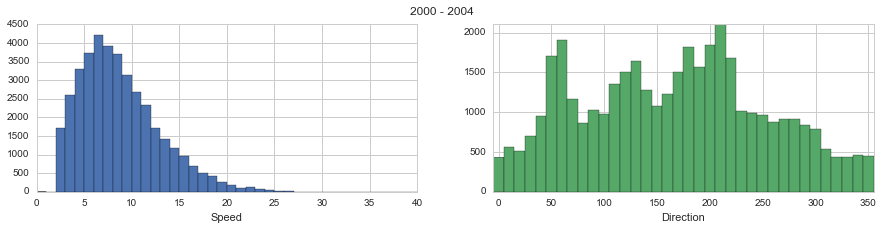

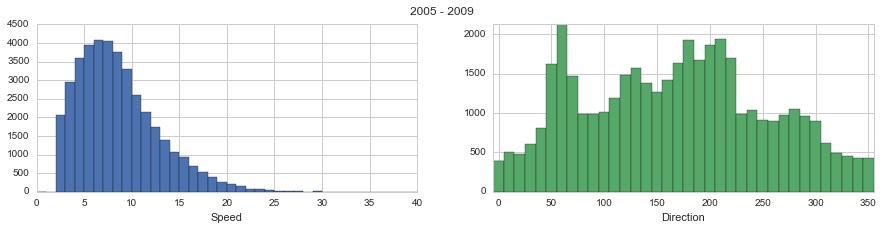

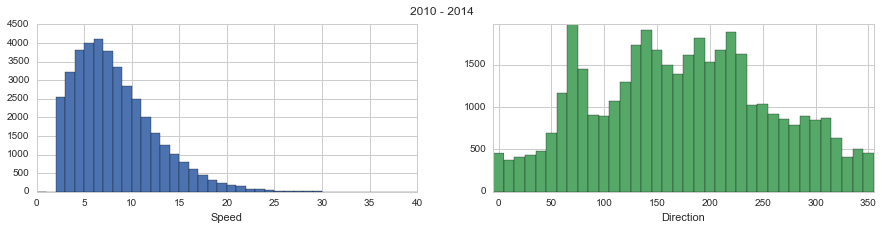

In [25]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
def check_time_shift(df):
    for start_time in xrange(19850000, 20150000, 50000):
        end_time = start_time + 50000 
        sub_df = df.query('(date >= @start_time) & (date < @end_time)')
        if len(sub_df) > 0 :
            title = '%s - %s' %(start_time//10000, end_time//10000-1)
            plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir, title)
        
check_time_shift(df)

## 1.5 Re-select data, and overview of the clean dataset

In [26]:
## Summery of the data selection
print 'incre_threshold for artefact detect:', incre_threshold
print 'Report type used:', report_type_most_used
print 'Sampling time used:', sampling_time_most_used

df_all_years = df
df = df.query('(date >= 20100000) & (date < 20150000)')
df.describe()

incre_threshold for artefact detect: 20
Report type used: FM-15
Sampling time used: 51


,date,HrMn,dir,speed,dir_windrose,decimal,incre,incre_reverse,x,y
count,3.919600e+04,39196.000000,39196.000000,39196.000000,39196.000000,39196.000000,39196.000000,39196.000000,39196.000000,39196.000000
mean,2.012067e+07,1211.406674,173.517931,8.292353,199.944892,0.520765,-0.012731,0.006506,-2.920725,1.074037
std,1.416316e+04,701.167090,84.244457,4.326914,105.377335,0.451112,2.566591,2.380617,6.107383,6.364157
min,2.010010e+07,51.000000,-4.925882,2.000983,0.000000,0.017288,-18.000000,-29.000000,-35.208139,-26.839368
25%,2.011033e+07,551.000000,110.115824,5.044536,130.000000,0.053997,-1.000000,-1.000000,-6.933069,-3.703759
50%,2.012063e+07,1251.000000,173.568930,7.494541,230.000000,0.913609,0.000000,0.000000,-2.900228,0.401653
75%,2.013100e+07,1851.000000,231.763524,10.672886,290.000000,0.967607,1.000000,1.000000,1.739628,5.783412
max,2.014123e+07,2351.000000,354.944515,39.929855,350.000000,0.997842,19.000000,15.000000,37.708597,31.054419


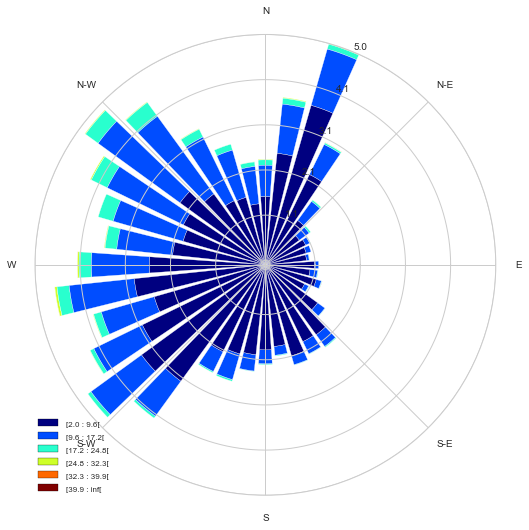

In [27]:
# 90 degree is in east
ax = WindroseAxes.from_ax()
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36)
ax.set_legend()

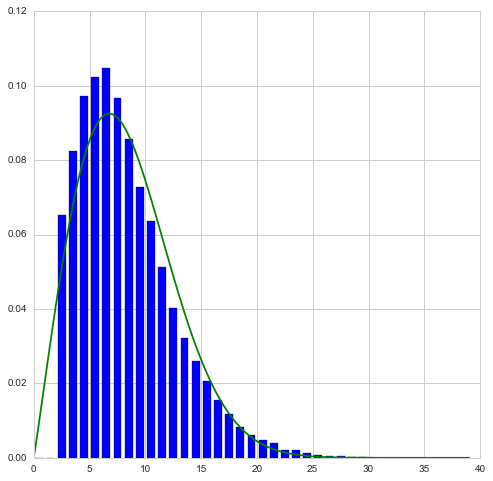

In [28]:
ax, _params = WindAxes.from_ax().pdf(df.speed, 
                                     bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)

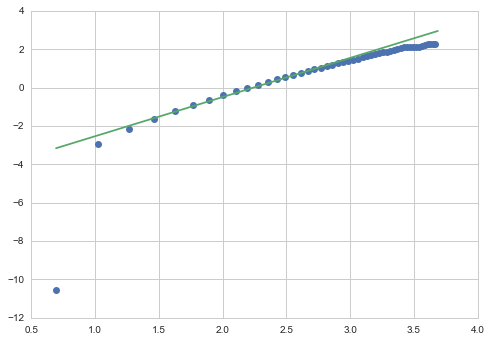

In [29]:
sample = df.speed
ecdf = sm.distributions.ECDF(sample)

x = linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(log(x), log(-log(1-y)),'o')

w_scale, c_shape = weibull_params[1], weibull_params[3]
qz=exp(-(x/c_shape)**w_scale)
plt.plot(log(x), log(-log(qz)),'-')

# 2. Create input data, i.e. speed_set

In [30]:
# speed_set = array(zip(-df.x, -df.y)) # Adjust the direction to match for Cook's paper
SPEED_SET = array(zip(df.x, df.y))
max_speed = df.speed.max()
NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7

In [31]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
plot_limit = ceil(df['speed'].quantile(.975))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)
    
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])
        
print fitting_axis_range

[-17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.
  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.
  13.  14.  15.  16.  17.]


# 3. Kernel Density Estimation

In [32]:
sample = SPEED_SET

In [33]:
# The bandwidth value sometimes would be too radical
from sklearn.grid_search import GridSearchCV

if knot_unit:
    bandwidth_range = arange(0.5,2,0.2)
else:
    bandwidth_range = arange(0.4,1,0.1)

grid = GridSearchCV(neighbors.KernelDensity(),
                    {'bandwidth': bandwidth_range},
                    n_jobs=-1, cv=4) 
grid.fit(sample)
bandwidth = grid.best_params_['bandwidth']

In [34]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH 

kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print 'bandwidth:', bandwidth, len(kde_result)
print kde_result[:5]

bandwidth: 1.3 1225
[  2.69349230e-06   6.24731348e-06   1.01269154e-05   1.32485699e-05
   1.73072838e-05]


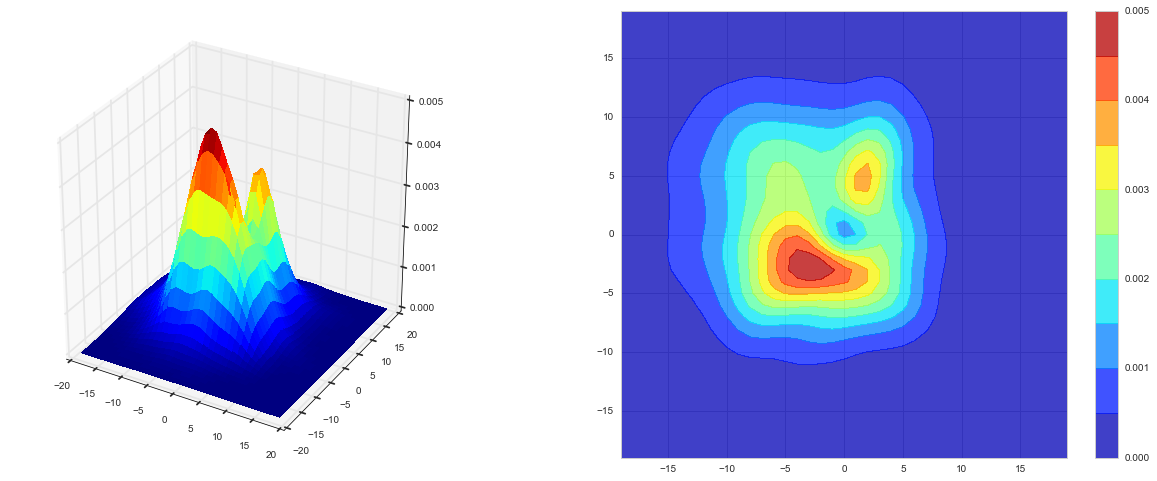

In [35]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,2,2)
plot_2d_prob_density(X,Y,kde_Z,ax2)

In [36]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM Estimation, using EM algo

In [37]:
sample= SPEED_SET
clf = mixture.GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print clf.converged_

True


In [38]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)  

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.391,-2.028,-3.333,5.241,3.903,-0.048
2,0.305,-7.519,3.322,5.664,6.340,-0.013
3,0.304,0.533,4.484,4.587,5.624,0.120


GMM Plot Result
0.390979184094 [[-2.02784096 -3.33260339]] [ 3.89331238  5.24859615] -94.5286656664
0.304607790402 [[-7.51877418  3.3221028 ]] [ 5.66115808  6.34228135] -176.606820622
0.304413025504 [[ 0.53347256  4.48429204]] [ 4.49533143  5.6979544 ] 164.896972224


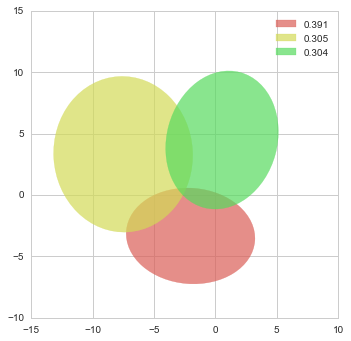

In [39]:
plot_gmm_ellipses(gmm_em_result)

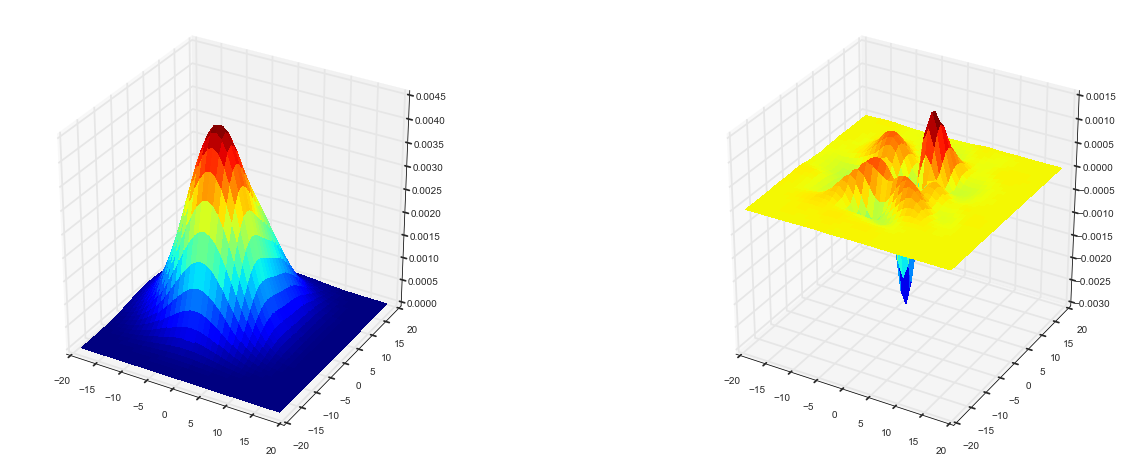

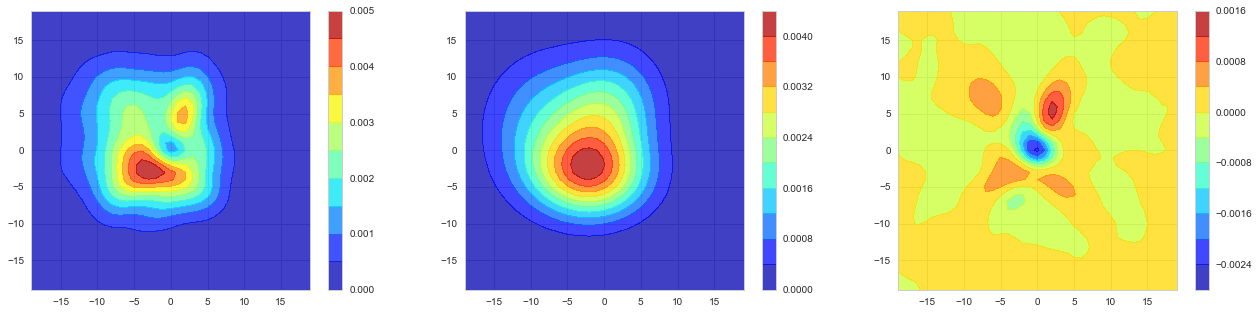

In [40]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(22,5))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2)
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3)

## GMM, EM VS. KDE

In [41]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points)[0])
# put into Pandas to make it looks better
pretty_pd_display([goodness_of_fit_summary(gmm_pdf_result, kde_result)])

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.051076,0.035234,8.213223e-08,0.058304,0.359582,0.924326


# 5. Least Square Prob Estimation

In [42]:
sample = SPEED_SET
points = FITTING_RANGE

In [43]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
        # {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
        # {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points,FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -17.343685759470233
     jac: array([  1.99138260e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.99138165e+00,  -2.38418579e-07,   0.00000000e+00,
         0.00000000e+00,   2.38418579e-07,   2.38418579e-07,
         1.99138284e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 926
     nit: 46
    njev: 46
  status: 0
 success: True
       x: array([ 0.1733788 ,  2.89619517,  5.10791686,  2.57855846,  4.32962119,
       -0.25365439,  0.20782571, -0.68148456, -3.91081548,  5.04939354,
        2.33601426, -0.24572711,  0.61879549, -5.34597323,  1.52051784,
        4.95337375,  7.15311134, -0.12432679])

## 5.1 GMM Result

In [44]:
# gmm = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)

pretty_print_gmm(gmm)

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.619,-5.346,1.521,4.953,7.153,-0.124
2,0.208,-0.681,-3.911,5.049,2.336,-0.246
3,0.173,2.896,5.108,2.579,4.330,-0.254


GMM Plot Result
0.618795493256 [[-5.34597323  1.52051784]] [ 4.88120421  7.20255224] -170.847177237
0.207825706329 [[-0.68148456 -3.91081548]] [ 2.24636503  5.08990981] -98.066950619
0.173378800416 [[ 2.89619517  5.10791686]] [ 2.45333408  4.40178774] -167.455439414


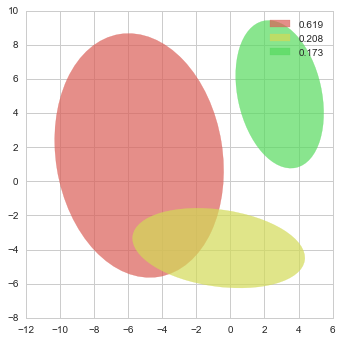

In [45]:
plot_gmm_ellipses(gmm)

## 5.2 Goodness-of-fit statistics

In [46]:
pretty_pd_display([goodness_of_fit_summary(gmm_pdf_result, kde_result)])

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.366147,0.025894,2.935844e-08,0.034858,0.214984,0.97295


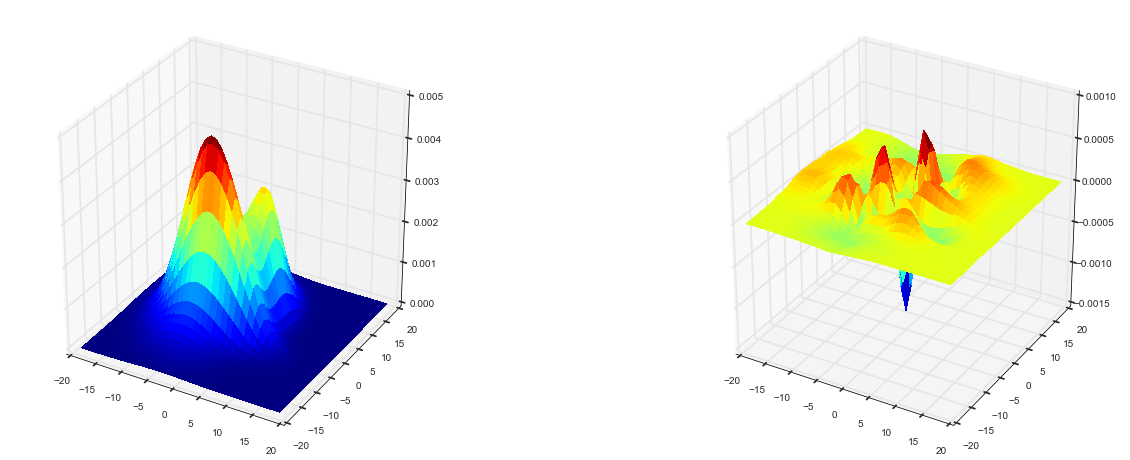

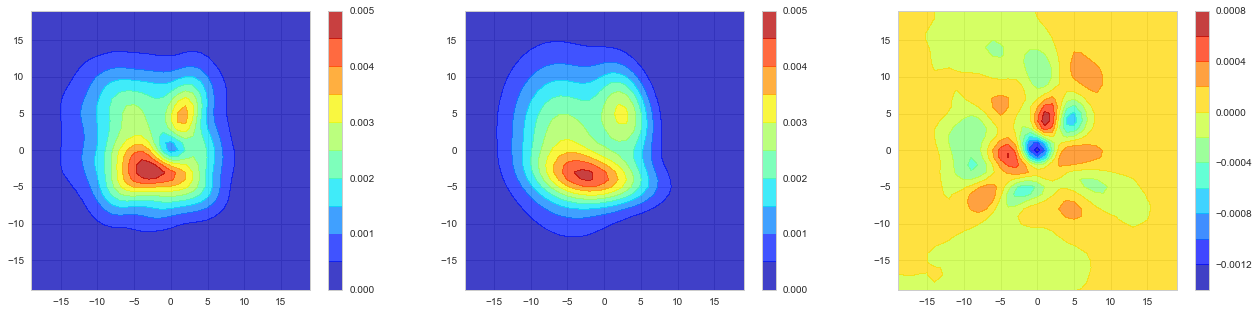

In [47]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(22,5))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2)
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3)

In [48]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

x_vals_OEN3_LMSE  = arange(0, max_speed)
y_vals_OEN3_LMSE =[integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x_vals_OEN3_LMSE ]

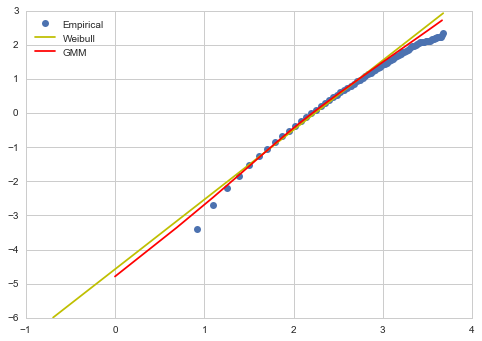

In [49]:
x = arange(0, max_speed, 0.5)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plt.plot(log(x), log(-log(1-y)),'o', label = 'Empirical')

# 2. Weibull distribution
w_scale, c_shape = weibull_params[1], weibull_params[3]
qz=exp(-(x/c_shape)**w_scale)
plt.plot(log(x), log(-log(qz)),'-', color = 'y', label = 'Weibull')

# 3. GMM distribution
x, y_ = x_vals_OEN3_LMSE, y_vals_OEN3_LMSE
y = array(zip(*y_)[0])
plt.plot(log(x), log(-log(1-y)),'-', color = 'r', label = 'GMM')

plt.legend(loc = 'best')
plt.show()

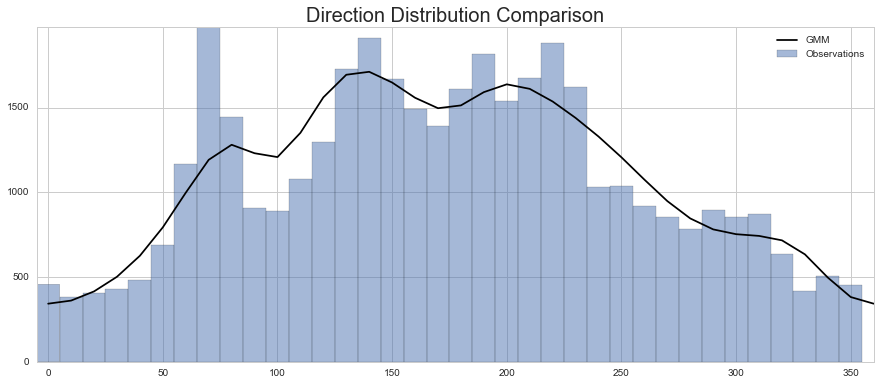

In [50]:
# Calculate Angle Distribution
x_vals = linspace(0,2*pi, num=36+1)
y_vals_ =[integrate.nquad(f, [[0, inf],[x_val-pi/36, x_val+pi/36]]) for x_val in x_vals]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y_vals = array(zip(*y_vals_)[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5,figsize=(15, 6), label = 'Observations')

plt.plot(x_vals/pi*180, y_vals,'-', color='black', label = 'GMM')
plt.title('Direction Distribution Comparison', fontsize = 20)
plt.axis('tight')
plt.legend()
plt.show()

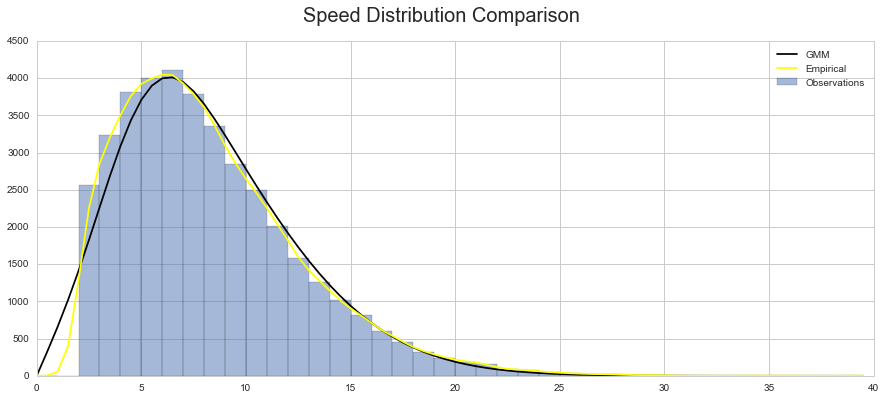

In [51]:
# Calculate Speed Distribution
# 1. GMM Model
x_vals = arange(0, max_speed, 0.5)
y_vals_ =[integrate.nquad(f, [[x_val-0.1, x_val+0.1],[0, 2*pi]]) for x_val in x_vals]
y_vals = array(zip(*y_vals_)[0])*len(df.speed)/0.2
plt.plot(x_vals, y_vals,'-', color='black', label = 'GMM')

# 2. Observation
df['speed'].hist(bins=arange(0, max_speed), alpha=0.5,figsize=(15, 6), label = 'Observations')

# 3. 1d KDE
sample = array(df.speed).reshape(-1, 1)
kde_temp = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(kde_temp.score_samples(x_val))*len(sample) for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow', label = 'Empirical')

plt.suptitle('Speed Distribution Comparison', fontsize = 20)
plt.legend()
plt.show()

## 5.3 Sectoral Comaprison

In [52]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    hist_y_axis = [0, max_speed, 0, max_count]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        direction_prob = integrate.nquad(f, 
                                         [[0, inf],
                                          [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        
        # 1. Count Comparison
        # 1.1. Data Histogram
        fig = plt.figure(figsize=(22,4))
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5)
        plt.axis(hist_y_axis)
        
        # 1.2. Model Distribution
        x_vals = linspace(0, sub_max_speed, 20)
        y_vals_ =[integrate.nquad(f, 
                  [[x_val-0.1, x_val+0.1],
                   [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                  for x_val in x_vals]
        y_vals = array(zip(*y_vals_)[0])/direction_prob[0] * len(sub_df.speed)/0.2
        plt.plot(x_vals, y_vals,'-', color='black')
        
        # 2. CDF Comaprison
        x = linspace(0, sub_max_speed, 20)
        # 2.1. Data's empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_cdf = ecdf(x)
        
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_gmm = array(zip(*y_)[0])/direction_prob[0]
                
        # 2.3.1. Plot in ordinary axis
        ax3 = fig.add_subplot(1,3,2)
        plt.plot(x, y_cdf,'o')
        plt.plot(x, y_gmm,'-', color = 'r')
        
        # 2.3.2. Weibull plot
        ax4 = fig.add_subplot(1,3,3)
        plt.plot(log(x), log(-log(1-y_cdf)),'o')
        plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'r')
        
        plt.suptitle('%s (%s - %s) Degree Speed Distribution Comparison' % (angle, start_angle, end_angle), 
                     fontsize = 15)
        plt.show()
        
        diff = abs(y_cdf - y_gmm)
        max_diff_array.append([angle, diff.max(), x[diff.argmax()]])
#         print 'data size:', len(sub_df)
#         print 'max diff:', diff.max(), ', speed value:', x[diff.argmax()], 'y gmm', y_gmm[diff.argmax()],
    return max_diff_array

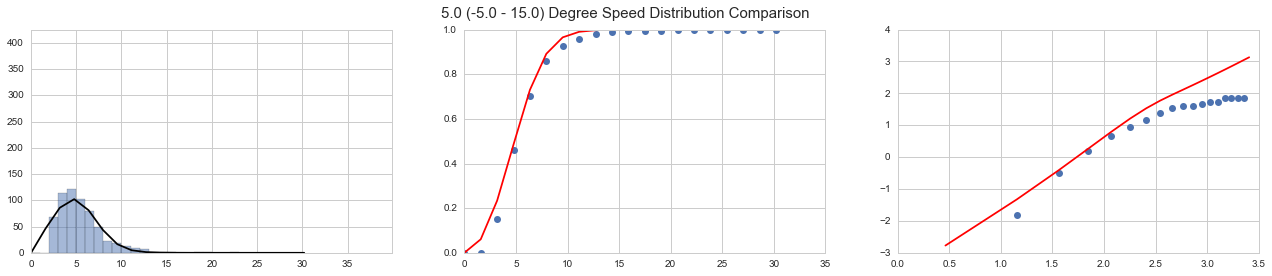

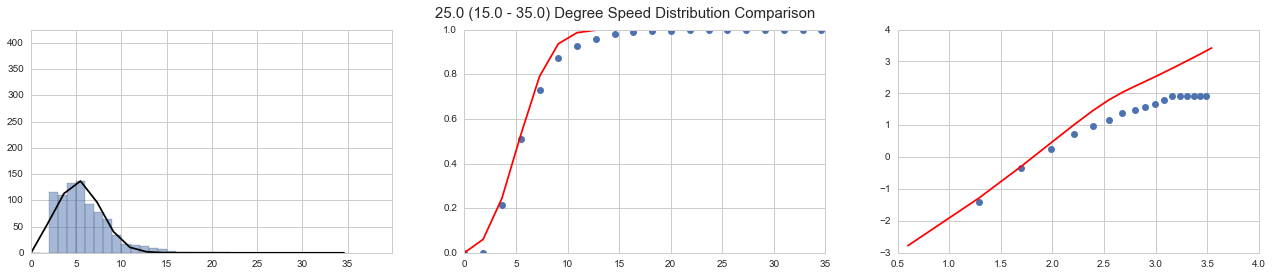

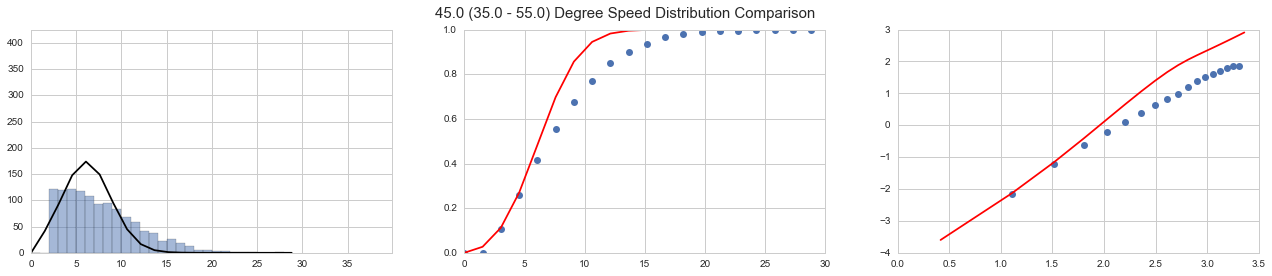

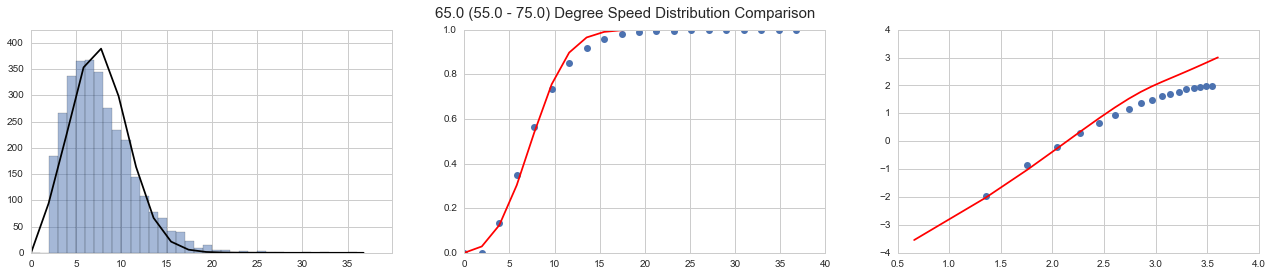

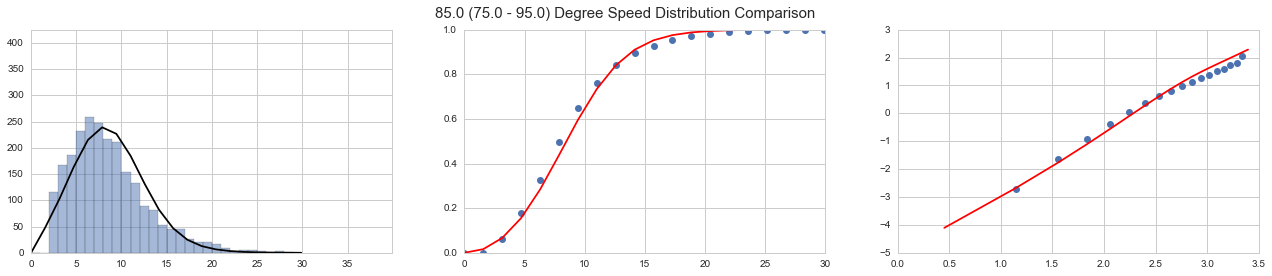

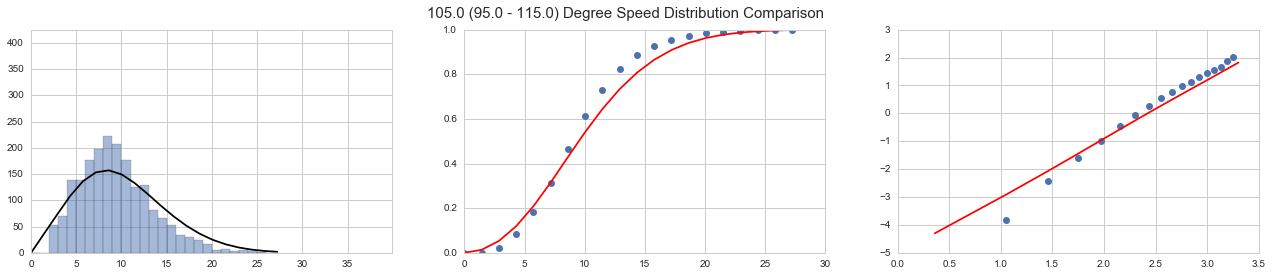

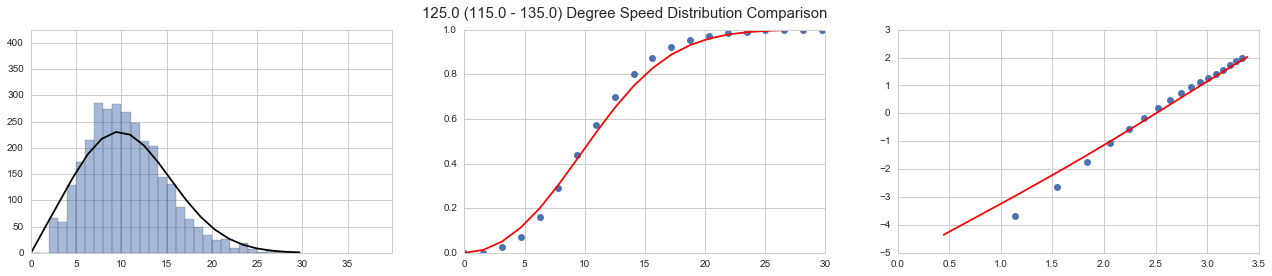

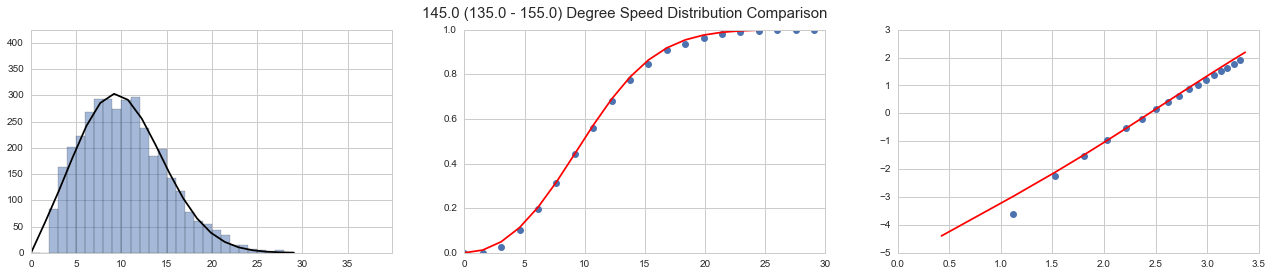

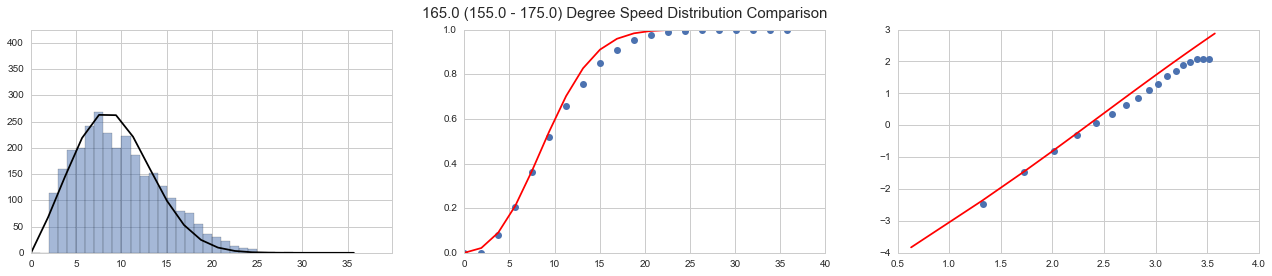

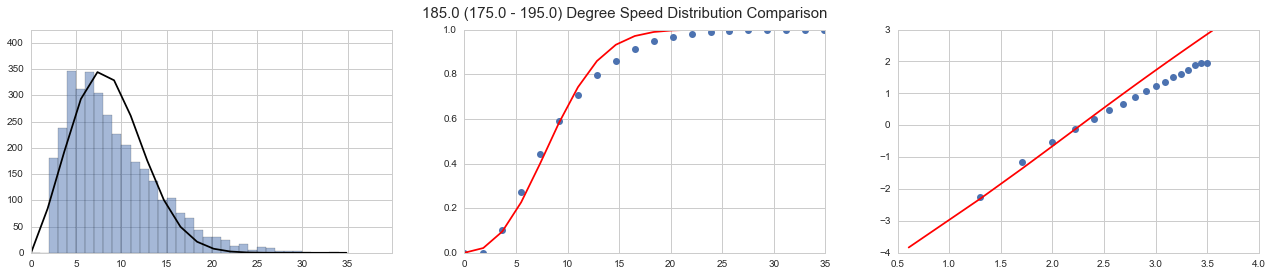

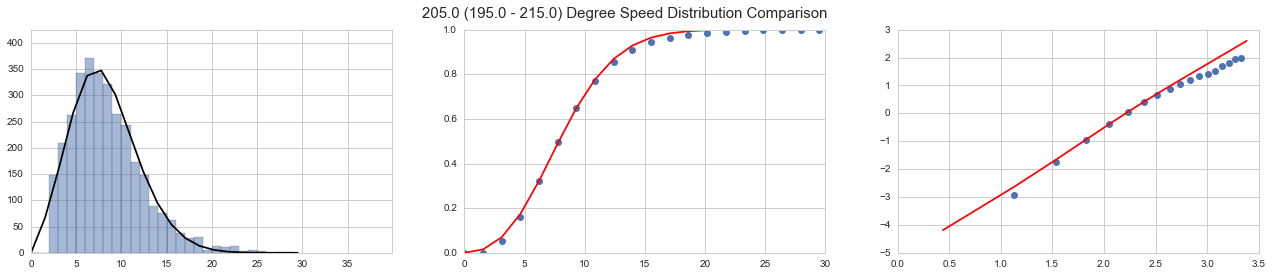

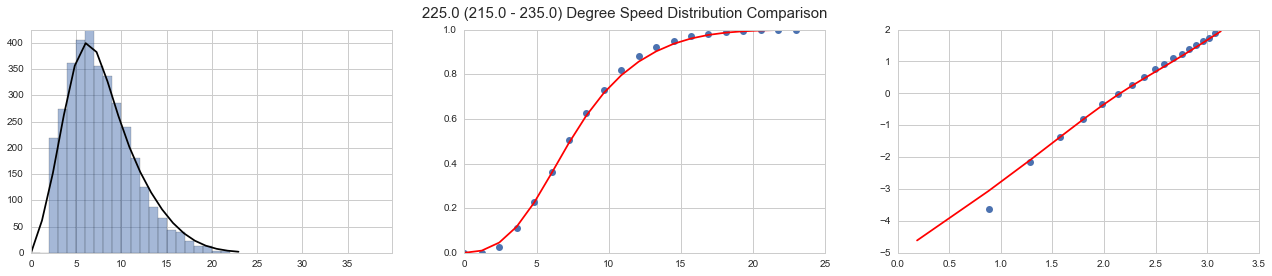

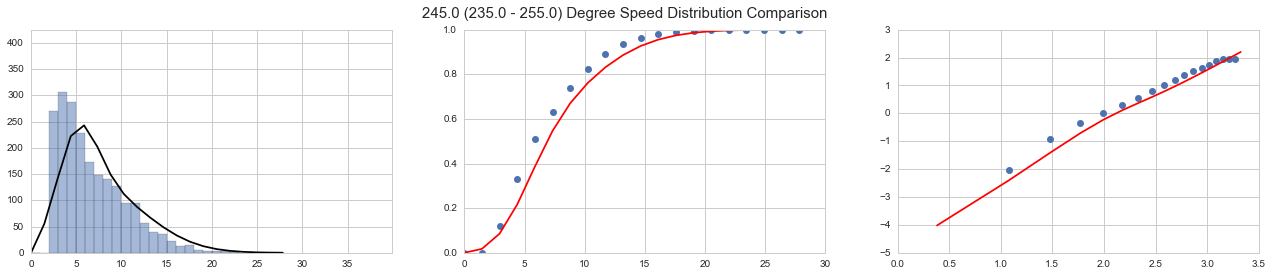

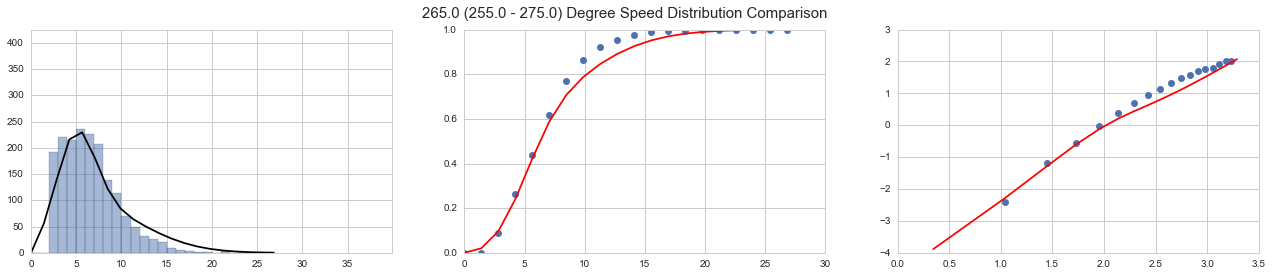

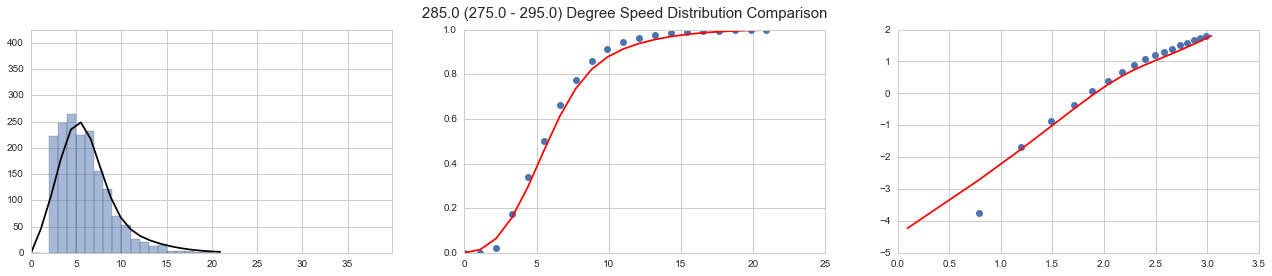

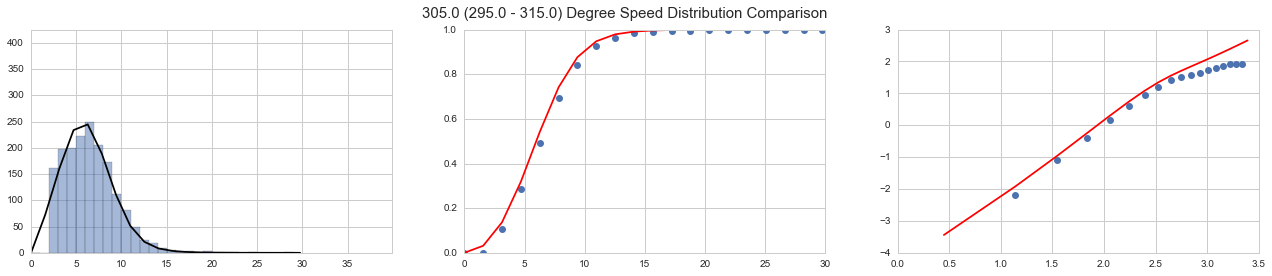

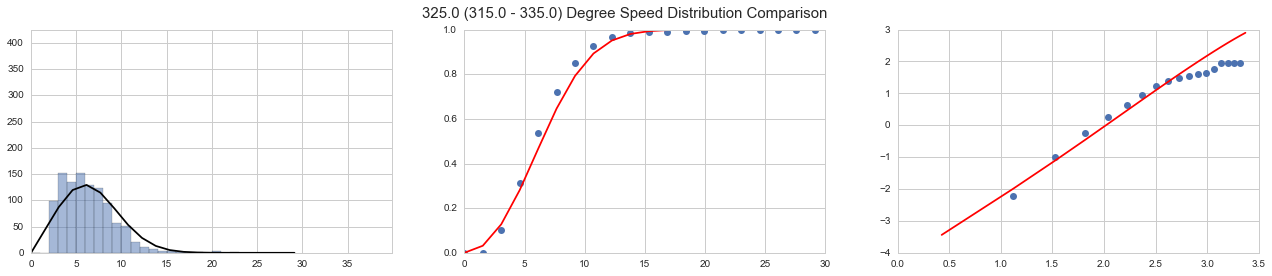

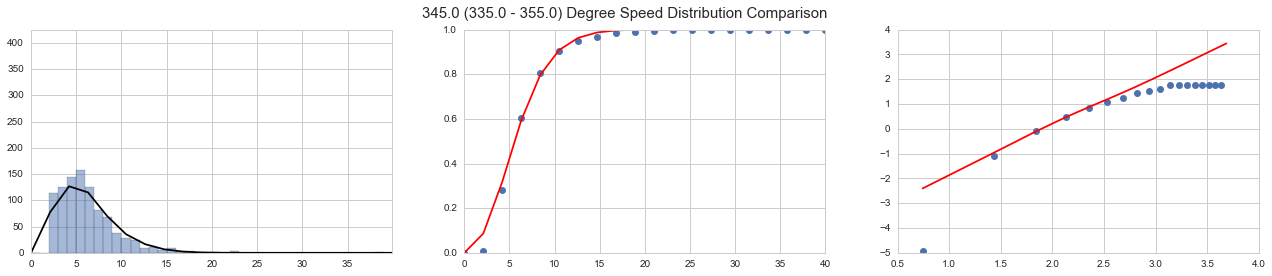

In [53]:
if len(effective_coloumn) == 16:
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 22.5)
else: 
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 20)

### 5.3.1 Variability over the years

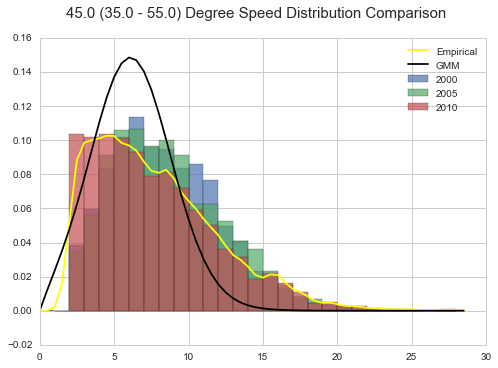

In [54]:
max_diff_element = max(max_diff_array, key=lambda x: x[1])
angle =  max_diff_angle = max_diff_element[0]
incre = 20

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, max_speed = select_df_by_angle(df, start_angle, end_angle)

x_vals = arange(0, max_speed, 0.5)

# 1. 1d KDE 
sample = array(sub_df.speed).reshape(-1, 1)
sub_kde = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(sub_kde.score_samples(x_val))
          for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow', label = 'Empirical')

# 2. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.1, x_val+0.1],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0] /0.2
plt.plot(x_vals, y_vals,'-', color='black', label = 'GMM')

for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years) > 0 :
        df_other_years_at_angle['speed'].hist(bins=arange(0, max_speed), 
                                              normed=True,alpha=0.7,
                                              label = str(int(start_time/10000)))

plt.suptitle('%s (%s - %s) Degree Speed Distribution Comparison' % (angle, start_angle, end_angle), 
             fontsize = 15)
plt.legend()
plt.show()

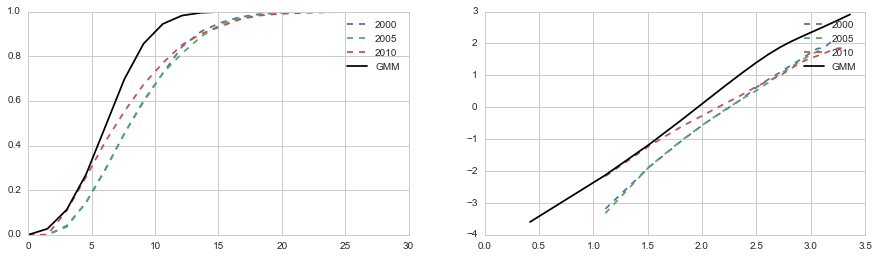

In [55]:
fig = plt.figure(figsize=(15,4))

x = linspace(0, max_speed, 20)
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        sample = df_other_years_at_angle.speed
        ecdf = sm.distributions.ECDF(sample)
        y_cdf = ecdf(x)

        ax1 = fig.add_subplot(1,2,1) 
        plt.plot(x, y_cdf,'--', label = str(int(start_time/10000)))

        ax3 = fig.add_subplot(1,2,2) 
        plt.plot(log(x), log(-log(1-y_cdf)),'--', label = str(int(start_time/10000)))
       
y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1 = fig.add_subplot(1,2,1) 
plt.plot(x, y_gmm,'-', color = 'black', label = 'GMM')
plt.legend()

ax3 = fig.add_subplot(1,2,2) 
plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'black',label = 'GMM')
plt.legend()

### 5.3.2 Bootstrap, to see the variability of each sector

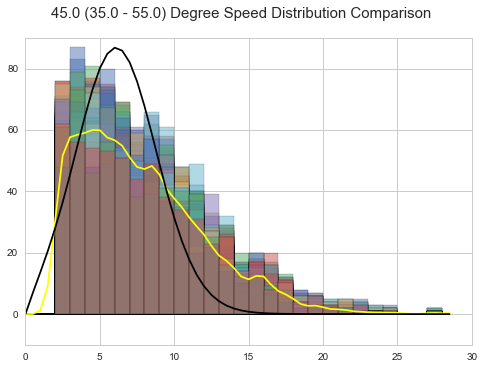

In [56]:
FRACTION = 0.5 

x_vals = arange(0, max_speed, 0.5)

# 1. 1d KDE 
sample = array(sub_df.speed).reshape(-1, 1)
sub_kde = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(sub_kde.score_samples(x_val))*len(sub_df.speed)*FRACTION
          for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow')

#2. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.1, x_val+0.1],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0]/0.2 *len(sub_df.speed)*FRACTION
plt.plot(x_vals, y_vals,'-', color='black')

bins = arange(0, max_speed, 1)
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    sub_df_resampled['speed'].hist(bins=bins, alpha=0.5)

plt.suptitle('%s (%s - %s) Degree Speed Distribution Comparison' % (angle, start_angle, end_angle), 
             fontsize = 15)

0.183018504279 9.09972805225 0.856522777783


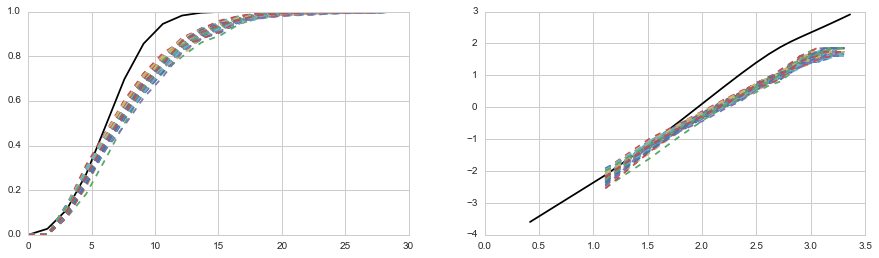

In [57]:
fig = plt.figure(figsize=(15,4))

x = linspace(0, max_speed, 20)
y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1 = fig.add_subplot(1,2,1) 
plt.plot(x, y_gmm,'-', color = 'black')

ax3 = fig.add_subplot(1,2,2) 
plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'black')

for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    
    sample = sub_df_resampled.speed
    ecdf = sm.distributions.ECDF(sample)
    y_cdf = ecdf(x)

    ax1 = fig.add_subplot(1,2,1) 
    plt.plot(x, y_cdf,'--')

    ax3 = fig.add_subplot(1,2,2) 
    plt.plot(log(x), log(-log(1-y_cdf)),'--')
    
diff = abs(y_cdf - y_gmm)
print diff.max(), x[diff.argmax()], y_gmm[diff.argmax()]

# 6. Variability of results & Cross-Validation

In [58]:
from sklearn.cross_validation import train_test_split, KFold

if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
    
points = FITTING_RANGE
    
def fit_gmm(df, number_of_gaussian = 3, fit_method = 'square_error'):
    # 1. Create Input, speed_set
    sample = sub_speed_set = array(zip(df.x, df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    kde_result = exp(kde.score_samples(points))
    
    clf = mixture.GMM(n_components=number_of_gaussian, covariance_type='full')
    clf.fit(sample)
    gmm_em_result = read_gmm_em_result(clf)
        
    # 3. GMM fitting
    x0 = gmm_em_result
    bonds = [(0., 0.99),(-fit_limit, fit_limit),
             (-fit_limit, fit_limit),(0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)
    cons = [{'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
#             {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#             {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
           ]
 
    result = sp.optimize.minimize(
        lambda x0: GMM_fit_score(x0, kde_result, points, method=fit_method),
        x0,
        bounds = bonds,
        constraints = cons,
        tol = 0.000000000001,
        options = {"maxiter": 500})  
    
    # 4. Returns
    gmm = group_gmm_param_from_gmm_param_array(result.x)  
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    gmm_pdf_result = mixed_model_pdf(points)
    
    return {
        'gmm' : gmm,
        'kde_clf': kde,
        'kde_result': kde_result,
        'gmm_pdf_result': gmm_pdf_result,
        'number_of_iteration': result.nit,
    }

## 6.1 Variability of the Result

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.605,-5.534,1.485,4.804,7.198,-0.120
2,0.210,-0.747,-3.909,4.942,2.353,-0.284
3,0.185,2.860,4.892,2.642,4.418,-0.248


GMM Plot Result
0.605378732029 [[-5.53423983  1.48541193]] [ 4.74287413  7.23848488] -171.968100038
0.209593870998 [[-0.74655958 -3.90861216]] [ 2.23103908  4.99837777] -99.6419230019
0.185027396973 [[ 2.86002627  4.89209352]] [ 2.51914518  4.4898138 ] -167.608737969


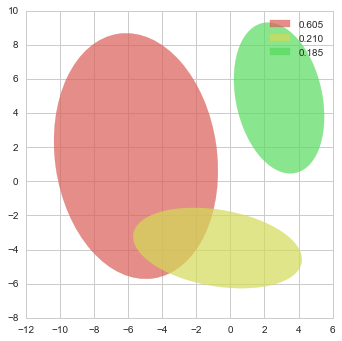

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,1.026792,0.027521,3.028178e-08,0.035024,0.218641,0.972387


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.652,-5.159,1.503,5.301,7.042,-0.094
2,0.194,-0.860,-3.839,4.818,2.228,-0.266
3,0.155,2.901,4.910,2.405,4.419,-0.301


GMM Plot Result
0.651814807324 [[-5.15906243  1.50261258]] [ 5.24801771  7.08183947] -170.940707767
0.193648990748 [[-0.86043081 -3.83892808]] [ 2.12765697  4.86287776] -98.6939614071
0.154536201928 [[ 2.90138526  4.90954095]] [ 2.25285064  4.49907819] -167.503126507


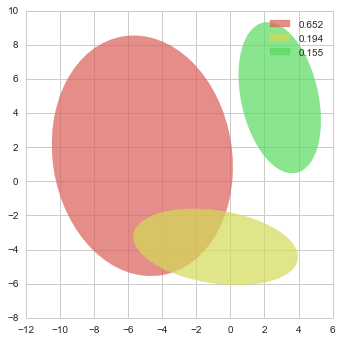

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.152297,0.027382,2.832551e-08,0.033073,0.211183,0.974287


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.612,-5.282,1.534,4.933,7.152,-0.141
2,0.217,-0.545,-3.904,5.239,2.354,-0.192
3,0.171,2.824,5.288,2.548,4.127,-0.224


GMM Plot Result
0.611873804402 [[-5.28202933  1.53427444]] [ 4.84157027  7.2139692 ] -169.836550024
0.217142261642 [[-0.54535974 -3.90357661]] [ 2.30018517  5.26308813] -96.0891795733
0.170983933956 [[ 2.82439075  5.28775759]] [ 2.44759259  4.18782142] -167.963628423


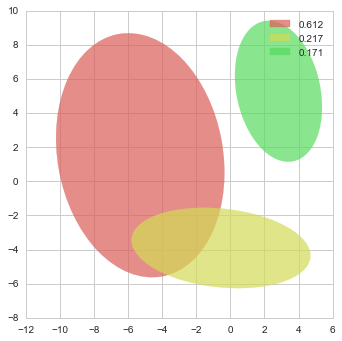

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.436385,0.024116,2.932055e-08,0.035633,0.214591,0.973122


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.635,-5.290,1.606,5.051,7.121,-0.119
2,0.199,-0.640,-3.968,4.976,2.307,-0.238
3,0.167,2.973,5.057,2.491,4.318,-0.257


GMM Plot Result
0.634855542304 [[-5.29034344  1.60550813]] [ 4.98010962  7.17019362] -170.608733553
0.198597651571 [[-0.63963425 -3.9679169 ]] [ 2.22403838  5.01363249] -97.8385956549
0.166546806125 [[ 2.97317326  5.05672183]] [ 2.37072111  4.38554074] -168.018492569


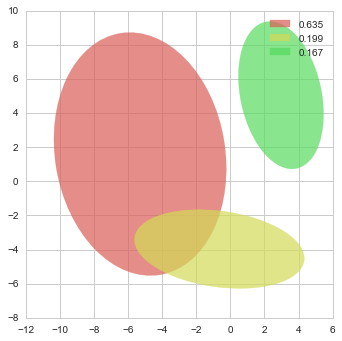

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.212433,0.026516,2.847963e-08,0.035234,0.211937,0.973489


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.623,-5.212,1.586,5.025,7.082,-0.103
2,0.210,-0.526,-3.943,5.214,2.367,-0.199
3,0.167,2.866,5.356,2.550,4.161,-0.236


GMM Plot Result
0.622937474828 [[-5.21231047  1.58565832]] [ 4.97258413  7.11892326] -171.817553157
0.210246677379 [[-0.52641641 -3.94271838]] [ 2.30842972  5.24006421] -96.4099393165
0.166815847793 [[ 2.86592993  5.35636043]] [ 2.43957045  4.22622139] -167.582143197


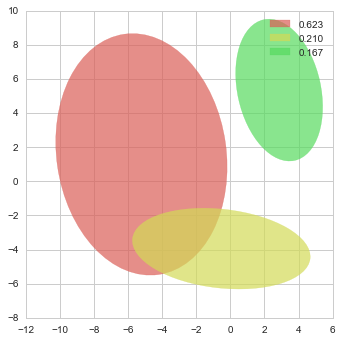

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.280774,0.025576,3.046422e-08,0.036742,0.219025,0.971622


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.607,-5.422,1.656,4.876,7.201,-0.115
2,0.216,-0.516,-3.930,5.001,2.343,-0.229
3,0.178,2.833,5.199,2.600,4.190,-0.223


GMM Plot Result
0.606502991002 [[-5.42177488  1.65571127]] [ 4.81746536  7.24006471] -171.977620234
0.215506056778 [[-0.51558945 -3.92973737]] [ 2.26473606  5.03708796] -97.6733674321
0.17799095222 [[ 2.83327194  5.19859927]] [ 2.49745017  4.2516605 ] -167.876594598


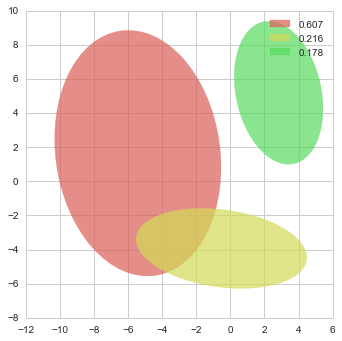

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.318372,0.027386,3.085731e-08,0.035825,0.220633,0.971687


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.617,-5.430,1.430,4.971,7.158,-0.147
2,0.207,-0.576,-3.886,5.053,2.357,-0.271
3,0.176,2.775,5.167,2.622,4.174,-0.252


GMM Plot Result
0.616910518326 [[-5.42978995  1.43002805]] [ 4.869659    7.22756425] -169.222214902
0.20666815175 [[-0.57602851 -3.88617735]] [ 2.24594753  5.10335342] -98.9571043554
0.176421329924 [[ 2.77474285  5.1669239 ]] [ 2.4896181   4.25420107] -166.205852736


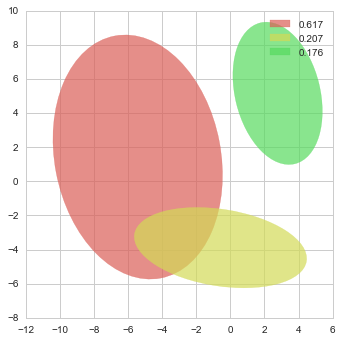

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.405638,0.026449,2.908711e-08,0.034729,0.214107,0.973161


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.624,-5.341,1.583,5.044,7.230,-0.146
2,0.213,-0.612,-3.838,5.130,2.318,-0.216
3,0.163,2.785,5.291,2.527,4.079,-0.226


GMM Plot Result
0.623954544771 [[-5.34085826  1.58260065]] [ 4.94229181  7.30029694] -169.163813706
0.213115764296 [[-0.61159078 -3.838011  ]] [ 2.24998364  5.15980417] -96.8820773355
0.162929690933 [[ 2.78505802  5.29149373]] [ 2.42436401  4.1403435 ] -167.762050692


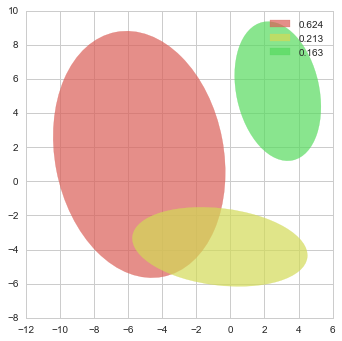

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.279471,0.026466,2.993710e-08,0.034636,0.217401,0.972261


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.633,-5.286,1.501,4.993,7.111,-0.119
2,0.200,-0.570,-3.906,5.063,2.324,-0.251
3,0.167,2.891,5.194,2.529,4.255,-0.229


GMM Plot Result
0.633395103857 [[-5.28559325  1.50073979]] [ 4.92501996  7.15894983] -170.87315968
0.199608216388 [[-0.5701355 -3.9058287]] [ 2.23062601  5.10486727] -98.1495983913
0.166996679755 [[ 2.89092713  5.19380557]] [ 2.42824829  4.31325721] -168.591638169


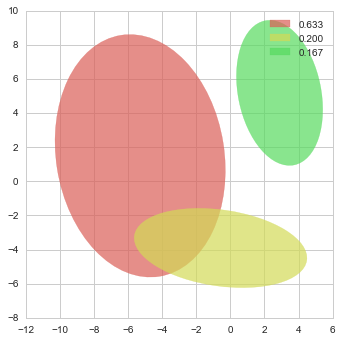

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.241091,0.024732,2.855293e-08,0.034818,0.212002,0.973662


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.600,-5.386,1.422,4.901,7.157,-0.138
2,0.217,-0.718,-3.840,5.043,2.372,-0.226
3,0.183,2.843,5.285,2.619,4.333,-0.247


GMM Plot Result
0.5995464079 [[-5.38566296  1.42185949]] [ 4.81529123  7.21524418] -170.209735265
0.217244620534 [[-0.71778742 -3.83958103]] [ 2.29440631  5.07884446] -97.6252969942
0.183208971566 [[ 2.84338238  5.28451293]] [ 2.49712311  4.40489477] -167.418773706


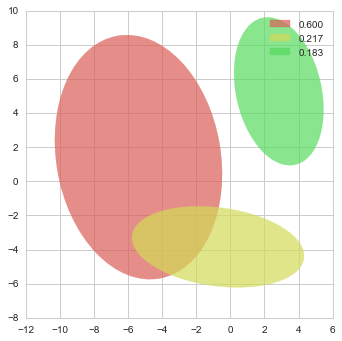

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.374566,0.025305,2.895650e-08,0.034182,0.213346,0.973669


In [59]:
for i in range(10):
    df_resampled = df.sample(frac=1, replace=True)
    result = fit_gmm(df_resampled, NUMBER_OF_GAUSSIAN, fit_method = FIT_METHOD)
    display(pretty_print_gmm(result['gmm']))
    plot_gmm_ellipses(result['gmm'])
    pretty_pd_display([goodness_of_fit_summary(result['gmm_pdf_result'], result['kde_result'])])

## 6.2 Cross-validation, to select the number of Gaussian

In [60]:
## 5-fold cross validation
gaussian_number_range = arange(1,7)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        CV_result_train.append(gof_train)
        CV_result_test.append(gof_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print 'Train'
    pretty_pd_display(CV_result_train)
    print 'Test'
    pretty_pd_display(CV_result_test)

Number of train/test dataset 29397.0 9799.0
  
Number of gaussian 1
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.091728,0.054209,1.513657e-07,0.078258,0.488286,0.860826
1,0.091345,0.054068,1.485854e-07,0.079824,0.483585,0.863408
2,0.092007,0.054198,1.514204e-07,0.078507,0.488247,0.860267
3,0.092502,0.054414,1.538404e-07,0.079970,0.492045,0.858018


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.097542,0.049678,1.534850e-07,0.082525,0.491150,0.858114
1,0.097247,0.059580,1.665113e-07,0.078856,0.512188,0.846237
2,0.097987,0.054437,1.532686e-07,0.081399,0.491187,0.859837
3,0.091112,0.053194,1.422711e-07,0.076235,0.473490,0.869927


  
Number of gaussian 2
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.243454,0.018740,5.836504e-08,0.048329,0.303143,0.946288
1,0.179716,0.019532,5.698561e-08,0.048977,0.299447,0.947444
2,0.163833,0.018453,5.789921e-08,0.049141,0.302091,0.946541
3,0.229569,0.019943,5.803993e-08,0.049244,0.302146,0.946691


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.148468,0.020089,6.030928e-08,0.052160,0.308064,0.944480
1,0.245387,0.019839,6.223447e-08,0.049501,0.313232,0.942975
2,0.285184,0.024468,6.126289e-08,0.049313,0.309998,0.944140
3,0.201853,0.020016,6.046785e-08,0.049255,0.308935,0.943964


  
Number of gaussian 3
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.311681,0.025767,2.931913e-08,0.034773,0.214865,0.973109
1,0.372177,0.025610,3.005761e-08,0.035250,0.217432,0.972256
2,0.370273,0.025421,2.930641e-08,0.035089,0.214763,0.972874
3,0.418808,0.026718,2.931744e-08,0.034658,0.214937,0.973064


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.500519,0.032253,3.385499e-08,0.037009,0.230783,0.968487
1,0.313218,0.020931,3.163284e-08,0.036248,0.223457,0.971106
2,0.944871,0.027736,3.267930e-08,0.035971,0.226917,0.970372
3,0.206802,0.024804,3.292851e-08,0.037489,0.227354,0.969488


  
Number of gaussian 4
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.079206,0.019500,2.187201e-08,0.030451,0.185584,0.979859
1,0.072861,0.019729,2.178823e-08,0.030179,0.185251,0.979807
2,0.255399,0.020368,2.076736e-08,0.029370,0.180832,0.980800
3,0.117312,0.014479,2.110837e-08,0.029015,0.182204,0.980749


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.180611,0.021450,2.301047e-08,0.029794,0.190254,0.978821
1,0.145948,0.018893,2.628760e-08,0.032501,0.203279,0.976309
2,0.154947,0.022810,3.189127e-08,0.035878,0.223996,0.971101
3,0.061758,0.014668,2.617293e-08,0.034868,0.203281,0.975222


  
Number of gaussian 5
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.021597,0.011579,1.584951e-08,0.025433,0.158021,0.985383
1,0.019894,0.012115,1.494454e-08,0.025191,0.153357,0.986279
2,0.021050,0.011853,1.617567e-08,0.025697,0.159613,0.985107
3,0.021636,0.012049,1.634656e-08,0.026042,0.160350,0.984906


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.025594,0.014411,1.934661e-08,0.028907,0.174319,0.982284
1,0.026687,0.010051,2.241095e-08,0.029334,0.187934,0.979201
2,0.024772,0.012394,1.827773e-08,0.027726,0.169516,0.983176
3,0.024076,0.011251,1.806115e-08,0.027242,0.168838,0.983526


  
Number of gaussian 6
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,25.547327,0.006829,8.662571e-09,0.018727,0.116778,0.992082
1,0.024991,0.007078,7.619023e-09,0.017811,0.109538,0.992955
2,16.035146,0.006443,8.517738e-09,0.018739,0.115808,0.992165
3,12.606218,0.007168,8.827371e-09,0.019309,0.117855,0.991824


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,106.656320,0.012291,1.214810e-08,0.023196,0.138295,0.988565
1,0.022865,0.011302,9.430183e-09,0.019579,0.121779,0.991420
2,288.153880,0.010181,1.264778e-08,0.023017,0.141071,0.988322
3,0.354222,0.009058,1.231817e-08,0.021917,0.139361,0.988860


In [61]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print 'Train gof mean, std'
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print 'Test gof mean, std'
display(test_scores_mean)

Train gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.091896,0.054222,1.513030e-07,0.079140,0.488041,0.860630
1,0.204143,0.019167,5.782245e-08,0.048923,0.301707,0.946741
2,0.368234,0.025879,2.950015e-08,0.034942,0.215499,0.972826
3,0.131195,0.018519,2.138399e-08,0.029754,0.183468,0.980304
4,0.021044,0.011899,1.582907e-08,0.025591,0.157835,0.985419
5,13.553420,0.006880,8.406676e-09,0.018646,0.114995,0.992257


Test gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.095972,0.054222,1.538840e-07,0.079754,0.492004,0.858529
1,0.220223,0.021103,6.106862e-08,0.050057,0.310057,0.943890
2,0.491352,0.026431,3.277391e-08,0.036679,0.227128,0.969863
3,0.135816,0.019455,2.684057e-08,0.033260,0.205203,0.975363
4,0.025282,0.012027,1.952411e-08,0.028303,0.175152,0.982047
5,98.796822,0.010708,1.163606e-08,0.021927,0.135126,0.989292


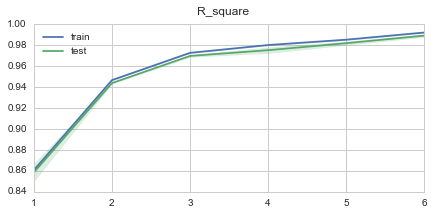

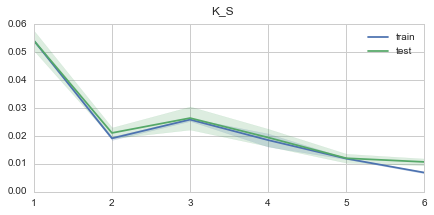

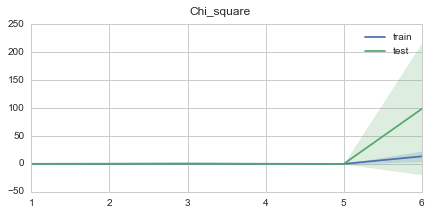

In [62]:
prop_cycle=sns.color_palette()
for column in ['R_square','K_S','Chi_square', ]:
    fig, ax = plt.subplots()
    fig.set_size_inches(7, 3)
    plt.plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plt.plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.suptitle(column)
    plt.xticks(gaussian_number_range)
    plt.legend(loc='best')
    plt.show()

In [63]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(ipath)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)

## 6.3 Variability of KDE

In [64]:
sss

NameError: name 'sss' is not defined

In [ ]:
gmm1 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,
        0.055879,1.009152,-1.430799,2.10049,0.808011,0.08083,
        0.019425,-0.432981,2.574572,0.784784,0.796954,-0.020531]

gmm2 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,]

gmm3 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,]

gmms = [gmm1,gmm2,gmm3]
pdfs =[]

for gmm in gmms:
    plot_gmm_ellipses(gmm)
    gmm = group_gmm_param_from_gmm_param_array(gmm) 
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    X = Y = PLOT_AXIS_RANGE
    pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument
    pdfs.append(pdf_Z)
    plot_2d_prob_density(X,Y,pdf_Z)

In [ ]:
plot_2d_prob_density(X,Y,pdfs[0]-pdfs[1])

In [ ]:
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    sub_df = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    sample = sub_speed_set = array(zip(sub_df.x, sub_df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    
    X = Y = PLOT_AXIS_RANGE
    kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 4)
    plot_2d_prob_density(X,Y,kde_Z,ax)
    plt.show()
#     plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir)

In [ ]:
# 5-fold cross validation
gaussian_number_range = arange(3,5)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_train = result['kde_clf']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        # Plot jPDF
        X = Y = PLOT_AXIS_RANGE
        kde_train_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_train.score_samples(coords)))
        fig = plt.figure(figsize=(22,6))
        ax1 = fig.add_subplot(1,3,1)
        plot_2d_prob_density(X,Y,kde_train_Z, ax1)
        
        ax2 = fig.add_subplot(1,3,2)
        kde_test_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_test.score_samples(coords)))
        plot_2d_prob_density(X,Y,kde_test_Z, ax2)
            
        ax3 = fig.add_subplot(1,3,3)
        plot_2d_prob_density(X,Y,kde_train_Z-kde_test_Z,ax3)
        
        pretty_pd_display([gof_train, gof_test], index=["gof_train", "gof_test"]))
        